In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Task 2: EDA

## Loading Data

In [2]:
# Loading Data

# Reading all csv files and adding one column to identify the person
subject1 = pd.read_csv('subject101.csv', header=None)
subject1[54] = 101
subject2 = pd.read_csv('subject102.csv', header=None)
subject2[54] = 102
subject3 = pd.read_csv('subject103.csv', header=None)
subject3[54] = 103
subject4 = pd.read_csv('subject104.csv', header=None)
subject4[54] = 104
subject5 = pd.read_csv('subject105.csv', header=None)
subject5[54] = 105
subject6 = pd.read_csv('subject106.csv', header=None)
subject6[54] = 106
subject7 = pd.read_csv('subject107.csv', header=None)
subject7[54] = 107
subject8 = pd.read_csv('subject108.csv', header=None)
subject8[54] = 108
subject9 = pd.read_csv('subject109.csv', header=None)
subject9[54] = 109

FileNotFoundError: [Errno 2] No such file or directory: 'subject101.csv'

In [ ]:
subject9.head()

In [3]:
# Concatenate rows along axis 0
result = pd.concat([subject1, subject2, subject3, subject4, subject5, subject6
                   , subject7, subject8, subject9], axis=0, ignore_index=True)


result.shape

(2872533, 55)

In [4]:
# Giving names to all columns based on description of data

hand = ['IMU_hand_temp','acceleration_x_16g_0', 'acceleration_y_16g_0', 'acceleration_z_16g_0',
                'acceleration_x_6g_0', 'acceleration_y_6g_0', 'acceleration_z_6g_0',
                'gyroscope_x_0', 'gyroscope_y_0', 'gyroscope_z_0',
                'magnetometer_x_0', 'magnetometer_y_0', 'magnetometer_z_0',
                'orientation1_0', 'orientation2_0', 'orientation3_0', 'orientation4_0']

chest = ['IMU_chest_temp','acceleration_x_16g_1', 'acceleration_y_16g_1', 'acceleration_z_16g_1',
                'acceleration_x_6g_1', 'acceleration_y_6g_1', 'acceleration_z_6g_1',
                'gyroscope_x_1', 'gyroscope_y_1', 'gyroscope_z_1',
                'magnetometer_x_1', 'magnetometer_y_1', 'magnetometer_z_1',
                'orientation1_1', 'orientation2_1', 'orientation3_1', 'orientation4_1']

ankle = ['IMU_ankle_temp','acceleration_x_16g_2', 'acceleration_y_16g_2', 'acceleration_z_16g_2',
                'acceleration_x_6g_2', 'acceleration_y_6g_2', 'acceleration_z_6g_2',
                'gyroscope_x_2', 'gyroscope_y_2', 'gyroscope_z_2',
                'magnetometer_x_2', 'magnetometer_y_2', 'magnetometer_z_2',
                'orientation1_2', 'orientation2_2', 'orientation3_2', 'orientation4_2']

column_names = ['timestamp', 'activity_id', 'heart_rate', *hand, *chest, *ankle, 'SubjectID']

# Assign the column names to the DataFrame
result.columns = column_names

In [ ]:
result.head()

## Any NA values?

In [ ]:
duplicate_rows = result[result.duplicated]
#print(duplicate_rows.shape)

result.isnull().sum()*100/result.shape[0]

             activity  pct_missing
7             running     0.909500
3             ironing     0.908794
11            walking     0.908754
9            standing     0.908651
0    ascending stairs     0.908639
1             cycling     0.908603
10    vacuum cleaning     0.908596
2   descending stairs     0.908589
8             sitting     0.908585
4               lying     0.908582
5      nordic walking     0.908573
6        rope jumping     0.908549


<Figure size 640x480 with 0 Axes>

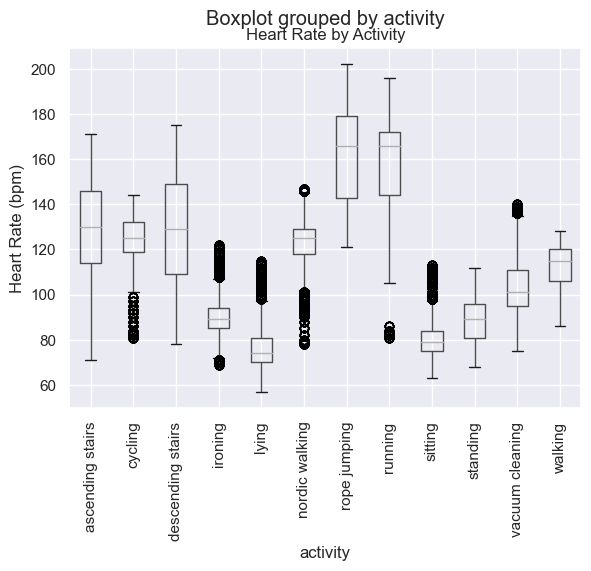

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Create dictionary to map activity IDs to labels
activity_dict = {1:'lying', 2:'sitting', 3:'standing', 4:'walking', 
                 5:'running', 6:'cycling', 7:'nordic walking', 
                 9:'watching TV', 10:'computer work', 11:'car driving',
                 12:'ascending stairs', 13:'descending stairs', 
                 16:'vacuum cleaning', 17:'ironing', 18:'folding laundry',
                 19:'house cleaning', 20:'playing soccer', 24:'rope jumping'}

# Add activity label column 
result['activity'] = result['activity_id'].map(activity_dict)

# Plot heart rate vs activity as boxplots
plt.figure()
result.boxplot(column='heart_rate', by='activity', rot=90)
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate by Activity')

# Calculate percentage of missing HR data per activity
hr_missing = result.groupby('activity')['heart_rate'].apply(lambda x: x.isna().mean()).reset_index(name='pct_missing')


# Print activities sorted by missing HR percentage
print(hr_missing.sort_values('pct_missing', ascending=False))

In [6]:
result= result.drop(columns=['heart_rate', 'activity'])
result.head(5)

,timestamp,activity_id,IMU_hand_temp,acceleration_x_16g_0,acceleration_y_16g_0,acceleration_z_16g_0,acceleration_x_6g_0,acceleration_y_6g_0,acceleration_z_6g_0,gyroscope_x_0,...,gyroscope_y_2,gyroscope_z_2,magnetometer_x_2,magnetometer_y_2,magnetometer_z_2,orientation1_2,orientation2_2,orientation3_2,orientation4_2,SubjectID
0,8.38,0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101


## Summary of Data

In [ ]:
# Temperature Description

r=result[result['activity_id']!=0]
selected_columns = ['IMU_hand_temp', 'IMU_chest_temp', 'IMU_ankle_temp']
r.groupby('activity_id')[selected_columns].describe()

In [ ]:
# Hand: Accelration vs Gryoscope vs Magnetometer according to activity

r=result[result['activity_id']!=0]
selected_columns = ['acceleration_x_16g_0', 'gyroscope_x_0', 'magnetometer_x_0']
r.groupby('activity_id')[selected_columns].describe()


In [ ]:
# Heart: Accelration vs Gryoscope vs Magnetometer according to activity

r=result[result['activity_id']!=0]
selected_columns = ['acceleration_x_16g_1', 'gyroscope_x_1', 'magnetometer_x_1']
r.groupby('activity_id')[selected_columns].describe()

In [ ]:
# Ankle: Accelration vs Gryoscope vs Magnetometer according to activity

r=result[result['activity_id']!=0]
selected_columns = ['acceleration_x_16g_2', 'gyroscope_x_2', 'magnetometer_x_2']
r.groupby('activity_id')[selected_columns].describe()

In [ ]:
# Total Number of Rows for each Subject

result['SubjectID'].value_counts().sort_values()

In [ ]:
result['activity_id'].value_counts().sort_values()

## Graphs 

In [ ]:
df = pd.DataFrame(result)

# Create a line plot for the three columns
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.plot(df['acceleration_x_16g_0'], label='Acceleration X')
plt.plot(df['acceleration_y_16g_0'], label='Acceleration Y')
plt.plot(df['acceleration_z_16g_0'], label='Acceleration Z')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Acceleration (16g)')
plt.title('Acceleration vs. Time')
plt.legend()

# Show the plot
plt.grid(True)  # Optional: Add a grid
plt.tight_layout()  # Optional: Ensure labels and titles fit within the plot area
plt.show()

In [ ]:
df = pd.DataFrame(result)

# Create a line plot for 'IMU_hand_temp', 'IMU_ankle_temp', and 'IMU_chest_temp' by 'subjectID'
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Plot lines for each temperature sensor
plt.plot(df['SubjectID'], df['IMU_hand_temp'], marker='o', label='IMU Hand Temp')
plt.plot(df['SubjectID'], df['IMU_ankle_temp'], marker='s', label='IMU Ankle Temp')
plt.plot(df['SubjectID'], df['IMU_chest_temp'], marker='^', label='IMU Chest Temp')

# Add labels and a title
plt.xlabel('Subject ID')
plt.ylabel('Temperature')
plt.title('Comparison of Temperatures by Subject ID')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)  # Optional: Add a grid
plt.tight_layout()  # Optional: Ensure labels and titles fit within the plot area
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Identify transition points
df = pd.DataFrame(result)

# Group by activity 
grouped = df.groupby(['SubjectID', 'activity_id'])['timestamp'].count()/6000
grouped

In [ ]:
df_durations = grouped.reset_index(name='hour') 

for subject_id, group in df_durations.groupby('SubjectID'):
    plt.figure(figsize=(5, 2))  # Adjust the figure size if needed
    plt.bar(group['activity_id'], group['hour'], align='center', alpha=0.7)
    plt.xlabel('Activity ID')
    plt.ylabel('Time Taken (hours)')
    plt.title(f'Activity Time Taken by SubjectID {subject_id}')
    plt.xticks(group['activity_id'])  # Set x-ticks to be the activity IDs
    plt.grid(axis='y')
    plt.show()

In [ ]:
# Difference between capture of accelaration in Hand, Heart, and Ankle sensors

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


d = result[(result['SubjectID']==101)]
filtered_df = d[d['activity_id'].isin([1,5])]
df_clean = filtered_df.dropna()


# Create 3D scatter plots for each person
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

for activity, group in df_clean.groupby('activity_id'):
    ax.scatter(group['acceleration_x_16g_0'], group['acceleration_y_16g_0'], group['acceleration_z_16g_0'], label=f'Activity {activity}')

ax.set_xlabel('Acceleration X')
ax.set_ylabel('Acceleration Y')
ax.set_zlabel('Acceleration Z')
ax.set_title('3D Acceleration (Hand)')
ax.legend()
plt.show()


In [ ]:
d = result[(result['SubjectID']==101)]
filtered_df = d[d['activity_id'].isin([1,5])]
df_clean = filtered_df.dropna()


# Create 3D scatter plots for each person
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

for activity, group in df_clean.groupby('activity_id'):
    ax.scatter(group['acceleration_x_16g_1'], group['acceleration_y_16g_1'], group['acceleration_z_16g_1'], label=f'Activity {activity}')

ax.set_xlabel('Acceleration X')
ax.set_ylabel('Acceleration Y')
ax.set_zlabel('Acceleration Z')
ax.set_title('3D Acceleration Heart')
ax.legend()
plt.show()

# Not as much reliable for accelaration, might not be the best feature to use for prediction

In [ ]:
d = result[(result['SubjectID']==101)]
filtered_df = d[d['activity_id'].isin([1,5])]
df_clean = filtered_df.dropna()


# Create 3D scatter plots for each person
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

for activity, group in df_clean.groupby('activity_id'):
    ax.scatter(group['acceleration_x_16g_2'], group['acceleration_y_16g_2'], group['acceleration_z_16g_2'], label=f'Activity {activity}')

ax.set_xlabel('Acceleration X')
ax.set_ylabel('Acceleration Y')
ax.set_zlabel('Acceleration Z')
ax.set_title('3D Acceleration Ankle')
ax.legend()
plt.show()

In [ ]:
v=result[result['activity_id']!=0]

plt.figure(figsize=(8, 6))
v.boxplot(column=['IMU_hand_temp'], by='activity_id', grid=False)
plt.xlabel('Activity ID')
plt.ylabel('Temperature')
plt.title('Temperature Data for different Activities (IMU Hand)')
plt.suptitle('')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
v.boxplot(column=['IMU_chest_temp'], by='activity_id', grid=False)
plt.xlabel('Activity ID')
plt.ylabel('Temperature')
plt.title('Temperature Data for different Activities (IMU Heart)')
plt.suptitle('')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
v.boxplot(column=['IMU_ankle_temp'], by='activity_id', grid=False)
plt.xlabel('Activity ID')
plt.ylabel('Temperature')
plt.title('Temperature Data for different Activities (IMU Ankle)')
plt.suptitle('')
plt.show()

# Task 4: Preprocessing

## Data Cleaning

In [7]:
d=result
filtered_df = d[d['activity_id'].isin([1,2,3,5])]
filtered_df.groupby('activity_id')[['orientation1_2','orientation2_2','orientation4_2']].value_counts()

activity_id  orientation1_2  orientation2_2  orientation4_2
1            1.000000         0.000000        0.000000         27184
             0.000006         0.582468        0.764446             1
             0.000009        -0.760839       -0.643811             1
             0.204161         0.345893       -0.510605             1
             0.204159         0.342653       -0.520528             1
                                                               ...  
5            0.001732         0.558948        0.769620             1
             0.001723         0.347479        0.539645             1
             0.001722        -0.513035       -0.644926             1
             0.001716        -0.425970       -0.579866             1
             0.001707        -0.227852       -0.572324             1
Length: 570675, dtype: int64

In [8]:
# Removing Orientation Columns as it's invalid to our model, this applies the same for subject ID. Now longer needed

# Columns to remove
columns_to_remove = ['orientation1_0', 'orientation2_0','orientation3_0','orientation4_0',
                    'orientation1_1','orientation2_1','orientation3_1','orientation4_1',
                    'orientation1_2','orientation2_2','orientation3_2','orientation4_2', 'SubjectID', 'timestamp']

# Remove specified columns
df = result.drop(columns=columns_to_remove)

In [ ]:
df.columns

In [ ]:
df.shape

In [9]:
# Removing Rows with activity ID=0

df = df[df['activity_id'] != 0]

In [ ]:
# Dealing with NA values

rows_with_na = df.isna().any(axis=1).sum()
rows_with_na

In [ ]:
grouped_data = df.groupby('activity_id')

na_counts_by_activity = grouped_data.apply(lambda x: x.isna().sum())
na_counts_by_activity

In [10]:
# Might Use Different Methods of NA fill to see the performance of our model:

# Imputation Based on Nearby Values:
for column in df.columns:
    df[column].interpolate(method='linear', inplace=True)

# Impute Based on Activity-Specific Patterns:
#activity_groups = df.groupby('activity_id')
#df['Column_with_missing_values'] = activity_groups['Column_with_missing_values'].apply(lambda x: x.interpolate(method='linear'))

# Multiple Imputation:

#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer

#imputer = IterativeImputer()
#df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [11]:
df.isnull().sum()

activity_id             0
IMU_hand_temp           0
acceleration_x_16g_0    0
acceleration_y_16g_0    0
acceleration_z_16g_0    0
acceleration_x_6g_0     0
acceleration_y_6g_0     0
acceleration_z_6g_0     0
gyroscope_x_0           0
gyroscope_y_0           0
gyroscope_z_0           0
magnetometer_x_0        0
magnetometer_y_0        0
magnetometer_z_0        0
IMU_chest_temp          0
acceleration_x_16g_1    0
acceleration_y_16g_1    0
acceleration_z_16g_1    0
acceleration_x_6g_1     0
acceleration_y_6g_1     0
acceleration_z_6g_1     0
gyroscope_x_1           0
gyroscope_y_1           0
gyroscope_z_1           0
magnetometer_x_1        0
magnetometer_y_1        0
magnetometer_z_1        0
IMU_ankle_temp          0
acceleration_x_16g_2    0
acceleration_y_16g_2    0
acceleration_z_16g_2    0
acceleration_x_6g_2     0
acceleration_y_6g_2     0
acceleration_z_6g_2     0
gyroscope_x_2           0
gyroscope_y_2           0
gyroscope_z_2           0
magnetometer_x_2        0
magnetometer

In [ ]:
# Duplicated Rows

df.duplicated().sum()

In [ ]:
# Anomalies

plt.scatter(df['IMU_hand_temp'], df['acceleration_x_16g_0'])


In [ ]:
sns.boxplot(x='IMU_hand_temp', data=df)

In [ ]:
from scipy.stats import zscore
z_scores = zscore(df['IMU_hand_temp'])
anomalies = (z_scores > 2) | (z_scores < -2)
anomalies.sum()

In [ ]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Detect outliers in all columns using the apply() function
outliers_df = df.apply(detect_outliers)

# Print the DataFrame with outliers flagged
print(outliers_df.sum())

In [ ]:
# No Outliers
sns.boxplot(x='IMU_chest_temp', data=df)

In [ ]:
sns.boxplot(x='IMU_ankle_temp', data=df)

In [12]:
# Test 1 Removing IMU Hand Temp Outlier

Q1 = df['IMU_hand_temp'].quantile(0.25)
Q3 = df['IMU_hand_temp'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['IMU_hand_temp'] > Q1 - 1.5 * IQR) & (df['IMU_hand_temp'] < Q3 + 1.5 * IQR)]
df_no_outliers.shape

(1918066, 40)

In [13]:
# Removing IMU Ankle Temp Outlier
Q1 = df['IMU_ankle_temp'].quantile(0.25)
Q3 = df['IMU_ankle_temp'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['IMU_ankle_temp'] > Q1 - 1.5 * IQR) & (df['IMU_ankle_temp'] < Q3 + 1.5 * IQR)]
df_no_outliers.shape

(1913584, 40)

In [ ]:
# After
sns.boxplot(x='IMU_ankle_temp', data=df_no_outliers)

In [ ]:
df_no_outliers.head()

## Data Transformation 

In [ ]:
import matplotlib.pyplot as plt 
from scipy.stats import probplot

# List all columns except target 
cols = [c for c in df_no_outliers.columns if c != 'activity_id']

# Plot histogram and Q-Q plot for each column
fig, axes = plt.subplots(nrows=len(cols), ncols=2, figsize=(12,50))

for i, c in enumerate(cols):
    # Histogram 
    ax = axes[i,0]
    ax.hist(df_no_outliers[c])
    ax.set_title(f'Histogram of {c}')
    
    # Q-Q Plot
    ax = axes[i,1] 
    probplot(df_no_outliers[c], plot=ax)
    ax.set_title(f'Q-Q Plot of {c}')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import kurtosis


var = df_no_outliers['IMU_hand_temp']
var2 = df_no_outliers['IMU_chest_temp']
var3 = df_no_outliers['IMU_ankle_temp']
kurt = kurtosis(var)
kurt2 = kurtosis(var2)
kurt3 = kurtosis(var3)

print("Kurtosis of IMU Hand Temp is:", kurt)
print("Kurtosis of IMU Chest Temp is:", kurt2)
print("Kurtosis of IMU Ankle Temp is:", kurt3)



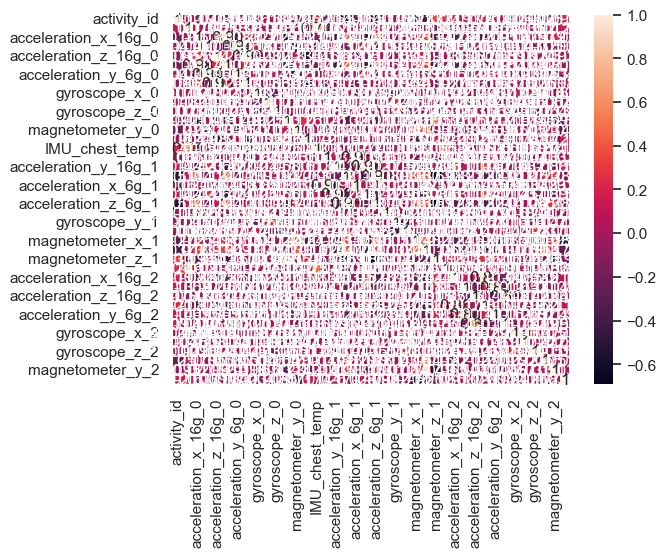

['acceleration_x_6g_0', 'acceleration_y_6g_0', 'acceleration_z_6g_0', 'acceleration_x_6g_1', 'acceleration_y_6g_1', 'acceleration_z_6g_1']


In [21]:
import seaborn as sns

corr_matrix = df_no_outliers.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()
threshold = 0.9
highly_corr = []
for i in range(len(corr_matrix .columns)):
      for j in range(i): 
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            highly_corr.append(colname)
print(highly_corr)
#####
df_no_outliers.drop(labels=highly_corr, axis=1, inplace=True)

In [ ]:

# One possiblity: create a new feature to capture the difference between activities sensors based on time

activity_mapping = {
    1: 'lying',
    2: 'sitting',
    3: 'standing',
    4: 'walking',
    5: 'running',
    6: 'cycling',
    7: 'Nordic Walking',
    8: 'ascending stairs',
    9: 'descending stairs',
    10: 'vacuum cleaning',
    11: 'ironing',
    12: 'rope jumping',
}

df_no_outliers['activity_id'].unique()

In [22]:
# Changing the label categories in one range from 1 to 12

change_cat = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 12:7, 13:8, 16:9, 17:10, 24:11}


df_no_outliers['activity_id'] = (df_no_outliers['activity_id']).replace(change_cat)
#df_no_outliers['activity_id'] = (df_no_outliers['activity_id']).replace({24:12})
df_no_outliers['activity_id'].unique()

array([ 0,  1, 10,  9,  6,  8,  2,  5,  4,  3, 11])

In [ ]:

# Check class distribution
class_counts = df_no_outliers['activity_id'].value_counts()


# Optionally, for percentages:
class_distribution = df_no_outliers['activity_id'].value_counts(normalize=True) * 100
print(class_distribution)

class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [55]:
# Train/Validation/Test split

# X contains 40 features and Y contains the target
X = df_no_outliers.iloc[:,1:34]  #40
y = df_no_outliers['activity_id']

# Perform stratified sampling for validation and test sets (balance class and reproducibility)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=73)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=73)

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Standardization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_val_standardized = scaler.transform(X_val)
X_test_standardized = scaler.transform(X_test)

######

# Min/Max

#scaler = MinMaxScaler()
#X_train_standardized = scaler.fit_transform(X_train)
#X_val_standardized = scaler.transform(X_val)



In [ ]:
# Cross Validation here

In [57]:
# 10%
import random
# Set the random seed to ensure reproducibility of random processes
random.seed(42)

# Convert the features and target values from training set to lists
train_x = list(X_train_standardized)
train_y = list(y_train)

# Min Max
#train_x = list(X_train_mm)
#train_y = list(y_train)

# Calculate 20% of the data length
twenty_percent = int(0.05 * len(train_x))

# Get the indices of 5% of the data points randomly
random_indices = random.sample(range(len(train_x)), twenty_percent)

# Select corresponding data points from train_x and train_y using random indices
train20_x = [train_x[i] for i in random_indices]
train20_y = [train_y[i] for i in random_indices]
print('Length of 5% dataset:',len(train20_x))
print('Length of full dataset:', len(X_train))


# X_val
val_x = list(X_val_standardized)
val_y = list(y_val)

# Min Max
#val_x = list(X_val_mm)
#val_y = list(y_val)

# Calculate 10% of the data length
twenty_percent = int(0.1 * len(val_x))

# Get the indices of 10% of the data points randomly
random_indices = random.sample(range(len(val_x)), twenty_percent)

# Select corresponding data points from train_x and train_y using random indices
val20_x = [val_x[i] for i in random_indices]
val20_y = [val_y[i] for i in random_indices]
print('Length of 5% dataset:',len(val20_x))
print('Length of full dataset:', len(X_val))







Length of 5% dataset: 76543
Length of full dataset: 1530867
Length of 5% dataset: 19135
Length of full dataset: 191358


In [ ]:
# Cross Validation for Logistic Regression before tuning


from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()
scores = cross_val_score(log_reg, train20_x, train20_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

In [58]:
# 1

'''
#from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'penalty': ['l1', 'l2'],                    # Type of regularization
    'solver': ['saga']                          # 'saga' supports both 'l1' and 'l2'
}


# Create a GridSearchCV object
log_reg = LogisticRegression(max_iter=5000)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(train20_x, train20_y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(val20_x)
# Evaluate using your preferred metric(s)
accuracy = accuracy_score(val20_y, y_pred)
print("Accuracy:", accuracy)
'''


# Train the logistic regression model
logistic_model = LogisticRegression(C=1, penalty='l2', solver='saga')
logistic_model.fit(train20_x, train20_y)

# Make predictions on the validation set
y_pred = logistic_model.predict(val20_x)

# Evaluate and display the model's accuracy
accuracy = accuracy_score(val20_y, y_pred)
print("Accuracy:", accuracy)

# Display detailed performance metrics
print("Classification Report:")
print(classification_report(val20_y, y_pred))




#




Accuracy: 0.7512934413378626
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3730
           1       0.73      0.73      0.73      1844
           2       0.72      0.82      0.77      2356
           3       0.60      0.56      0.58       967
           4       0.91      0.90      0.90      1659
           5       0.68      0.68      0.68      1905
           6       0.51      0.44      0.47      1129
           8       0.52      0.35      0.41      1041
           9       0.71      0.73      0.72      1734
          10       0.80      0.87      0.83      2395
          11       0.52      0.36      0.43       375

    accuracy                           0.75     19135
   macro avg       0.69      0.67      0.68     19135
weighted avg       0.74      0.75      0.74     19135



In [77]:
# Cross Validation after tuning to check if it overfits or not

log_reg = LogisticRegression(C=1, penalty='l2', solver='saga')
scores = cross_val_score(log_reg, train20_x, train20_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

Cross-validation scores: [0.75563394 0.75360899 0.75262917 0.75307029 0.75163313]
Mean Accuracy: 0.7533151048850094
Standard Deviation: 0.0013283700235363592


In [ ]:
# Cross Validation for SVC() before tuning

svc_m = SVC()
scores = cross_val_score(svc_m, train20_x, train20_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

In [62]:
# 2
# Support Vector Classification (SVC) model

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

"""
# Takes too much time, manually tuning
param_dist = {
    'C': uniform(0.1, 1),             # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
         # Degree for the 'poly' kernel. Ignored by other kernels           # Independent term in the kernel function. Only significant in 'poly' and 'sigmoid'
}

svc = SVC(random_state=42)
random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=5, cv=2, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_search.fit(train20_x, train20_y)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
best_svc = random_search.best_estimator_

"""



# Initialize the SVC model
svc_m = SVC()

# Train the model on your training data
svc_m.fit(train20_x, train20_y)

# Predict on the validation set
y_val_ = svc_m.predict(val20_x)

accuracy = accuracy_score(val20_y, y_pred)
print("Accuracy:", accuracy)

# Display detailed performance metrics
print("Classification Report:")
print(classification_report(val20_y, y_pred))



Accuracy: 0.9872484975176379
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3730
           1       0.99      0.99      0.99      1844
           2       0.96      0.99      0.98      2356
           3       1.00      1.00      1.00       967
           4       1.00      1.00      1.00      1659
           5       0.99      0.99      0.99      1905
           6       0.97      0.94      0.95      1129
           8       0.98      0.93      0.95      1041
           9       0.99      0.99      0.99      1734
          10       0.99      0.99      0.99      2395
          11       1.00      0.99      1.00       375

    accuracy                           0.99     19135
   macro avg       0.99      0.98      0.98     19135
weighted avg       0.99      0.99      0.99     19135



In [86]:
# Cross Validation for SVC() after tuning

svc_m = SVC()
scores = cross_val_score(svc_m, train20_x, train20_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)


# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

Cross-validation scores: [0.95865177 0.96146058 0.96100333 0.96152339 0.95995558]
Mean Accuracy: 0.9605189297663499
Standard Deviation: 0.0010893959751061407


In [ ]:
# # Cross Validation for KNN before tuning

knn = KNeighborsClassifier()
scores = cross_val_score(knn, train20_x, train20_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

In [64]:
# 3 #############
# KNN

"""
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list(range(1, 30,3)),  # typically a range of odd numbers is chosen to avoid ties
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'p': [1, 2]  # 1 is Manhattan, 2 is Euclidean
}


from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(train20_x, train20_y)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

y_pred = random_search.predict(val20_x)
# Evaluate using your preferred metric(s)
accuracy = accuracy_score(val20_y, y_pred)
print("Accuracy:", accuracy)

"""
#knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=10, p=1) 
# Fit the classifier to the training data
knn.fit(train20_x, train20_y)

# Predict the labels for the validation set
y_pred = knn.predict(val20_x)

# Calculate accuracy
accuracy = accuracy_score(val20_y, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
print("Classification Report:")
print(classification_report(val20_y, y_pred))



Accuracy: 0.9680167232819441
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3730
           1       0.95      0.99      0.97      1844
           2       0.92      0.99      0.95      2356
           3       1.00      0.99      0.99       967
           4       0.99      1.00      1.00      1659
           5       0.98      0.98      0.98      1905
           6       0.92      0.88      0.90      1129
           8       0.97      0.82      0.89      1041
           9       0.98      0.93      0.95      1734
          10       0.97      0.99      0.98      2395
          11       0.99      0.97      0.98       375

    accuracy                           0.97     19135
   macro avg       0.97      0.96      0.96     19135
weighted avg       0.97      0.97      0.97     19135



In [78]:
# # Cross Validation for KNN after tuning

knn = KNeighborsClassifier(n_neighbors=10, p=1)
scores = cross_val_score(knn, train20_x, train20_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

Cross-validation scores: [0.96270168 0.95995819 0.95616957 0.96282989 0.9587144 ]
Mean Accuracy: 0.960074747459541
Standard Deviation: 0.0025142042197910082


In [ ]:
# Cross Validation for Random Forest before tuning

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, train20_x, train20_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

In [71]:
# 4

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
"""
param_dist = {
    'n_estimators': randint(10, 200),  # number of trees in the forest
    'max_depth': [None] + list(randint(1, 20).rvs(5)),  # maximum depth of the tree
    'min_samples_split': randint(2, 11),  # minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 5),  # minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # method for sampling data points (with or without replacement)
    'max_features': ['auto', 'sqrt', 'log2']  # number of features to consider at every split
}



rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=2, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)

random_search.fit(train20_x, train20_y)


print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
best_rf = random_search.best_estimator_

y_pred = best_rf.predict(val20_x)
# Evaluate using your preferred metric(s)



"""

rf_classifier = RandomForestClassifier(n_estimators=5)

# Fit the classifier to the training data
rf_classifier.fit(train20_x, train20_y)

# Predict using the trained classifier
y_pred = rf_classifier.predict(val20_x)

# Calculate accuracy
accuracy = accuracy_score(val20_y, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
print("Classification Report:")
print(classification_report(val20_y, y_pred))



Accuracy: 0.9629474784426444
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3730
           1       0.97      0.99      0.98      1844
           2       0.93      0.98      0.96      2356
           3       0.97      0.98      0.97       967
           4       0.98      0.98      0.98      1659
           5       0.97      0.98      0.98      1905
           6       0.88      0.86      0.87      1129
           8       0.90      0.84      0.87      1041
           9       0.96      0.94      0.95      1734
          10       0.99      0.98      0.98      2395
          11       0.99      0.93      0.96       375

    accuracy                           0.96     19135
   macro avg       0.96      0.95      0.95     19135
weighted avg       0.96      0.96      0.96     19135



In [79]:
# Cross Validation for Random Forest after tuning
rf = RandomForestClassifier(n_estimators=5)

scores = cross_val_score(rf, train20_x, train20_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

Cross-validation scores: [0.95427526 0.95590829 0.94865765 0.9532924  0.95453358]
Mean Accuracy: 0.9533334355734973
Standard Deviation: 0.002482816263796114


In [ ]:
# # Cross Validation for Decision Tree before tuning

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(dt, train20_x, train20_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

In [74]:
# 5

# Decision Trees

from sklearn.tree import DecisionTreeClassifier

"""
param_dist = {
    'max_depth': [None] + list(randint(1, 20).rvs(10)),  # maximum depth of the tree
    'min_samples_split': randint(2, 11),  # minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 11),   # minimum number of samples required to be at a leaf node
}

dt = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=50, cv=2, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)


random_search.fit(train20_x, train20_y)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
best_dt = random_search.best_estimator_

y_pred = best_dt.predict(val20_x)
# Evaluate using your preferred metric(s)
accuracy = accuracy_score(val20_y, y_pred)
print("Accuracy: ",accuracy)


"""


# Initialize the classifier
clf = DecisionTreeClassifier()

# Fit the model to your data
clf.fit(train20_x, train20_y)

# Predict on validation or test set
y_pred = clf.predict(val20_x)

# Optionally, if you want to measure the accuracy or other metrics
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(val20_y, y_pred)
print("Accuracy: ",accuracy)

# Print a classification report
print("Classification Report:")
print(classification_report(val20_y, y_pred))



Accuracy:  0.9761693232296839
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3730
           1       0.98      0.98      0.98      1844
           2       0.99      0.98      0.99      2356
           3       0.98      0.97      0.97       967
           4       0.98      0.98      0.98      1659
           5       0.98      0.99      0.99      1905
           6       0.93      0.92      0.92      1129
           8       0.92      0.92      0.92      1041
           9       0.97      0.98      0.97      1734
          10       0.98      0.98      0.98      2395
          11       0.95      0.97      0.96       375

    accuracy                           0.98     19135
   macro avg       0.97      0.97      0.97     19135
weighted avg       0.98      0.98      0.98     19135



In [80]:
# # Cross Validation for Decision Tree after tuning

dt = DecisionTreeClassifier()
scores = cross_val_score(dt, train20_x, train20_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

Cross-validation scores: [0.96740479 0.96505324 0.96681691 0.96609616 0.9685132 ]
Mean Accuracy: 0.9667768581795622
Standard Deviation: 0.001170042613979911


In [ ]:
# Cross Validation for XGB before tuning
# Very High Accuracy without right parameters
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)
scores = cross_val_score(xgb_model, train20_x, train20_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

In [83]:
# 6
import xgboost as xgb
from scipy.stats import uniform


"""
param_dist = {
    'max_depth': randint(1, 10),  # maximum depth of the tree
    'objective': 'multi:softprob',
    'eta': randint(0.3,1.0),
}


xgb_model = xgb.XGBClassifier(random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, cv=2, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)


random_search.fit(train20_x, train20_y)


print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
best_xgb = random_search.best_estimator_

y_pred = best_xgb.predict(val20_x)
# Evaluate using your preferred metric(s)
accuracy = accuracy_score(val20_y, y_pred)
print("Accuracy:", accuracy)
"""



# Prepare data in the DMatrix format that XGBoost requires
dtrain = xgb.DMatrix(train20_x, label=train20_y)
dval = xgb.DMatrix(val20_x, label=val20_y)

# Set parameters
param = {
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'multi:softprob',
    'num_class': 12 
}

# Train model
num_round = 20
#bst = xgb.train(param, dtrain, num_round)
bst = xgb.train(param,dtrain, num_round)

# Predict
preds = bst.predict(dval)
y_pred = [int(pred.argmax()) for pred in preds]  # Convert probabilities to class labels

accuracy = accuracy_score(val20_y, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
print("Classification Report:")
print(classification_report(val20_y, y_pred))





Accuracy: 0.9339430363208779
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3730
           1       0.89      0.96      0.92      1844
           2       0.92      0.97      0.94      2356
           3       0.97      0.95      0.96       967
           4       0.98      0.95      0.96      1659
           5       0.98      0.98      0.98      1905
           6       0.83      0.73      0.78      1129
           8       0.82      0.79      0.81      1041
           9       0.91      0.90      0.90      1734
          10       0.93      0.97      0.95      2395
          11       0.97      0.92      0.95       375

    accuracy                           0.93     19135
   macro avg       0.93      0.92      0.92     19135
weighted avg       0.93      0.93      0.93     19135



In [ ]:
# Cross Validation for MLP before tuning

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
scores = cross_val_score(mlp, train20_x, train20_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

In [87]:
# 7
from sklearn.neural_network import MLPClassifier
# Feedforward Neural Network (MLP)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


"""

param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Example layer sizes
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': uniform(0.0001, 0.01),  # L2 penalty (regularization term) parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': uniform(0.001, 0.01),
    'max_iter': randint(100, 300),
    'momentum': uniform(0.5, 0.4),
}

mlp = MLPClassifier(random_state=42)
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=50, cv=2, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)

random_search.fit(train20_x, train20_y)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
best_mlp = random_search.best_estimator_


"""

mlp = MLPClassifier(
    activation='logistic',
    alpha=0.0064230583059357955,
    hidden_layer_sizes=(100,),
    learning_rate='invscaling',
    learning_rate_init=0.006357746840747585,
    max_iter=243,
    momentum=0.8341209982356952,
    solver='adam',
    random_state=42  # For reproducibility; you can omit or change this based on your needs
)

mlp.fit(train20_x, train20_y)

y_pred = mlp.predict(val20_x)


accuracy = accuracy_score(val20_y, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
print("Classification Report:")
print(classification_report(val20_y, y_pred))






Accuracy: 0.9822315129344134
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3730
           1       0.96      1.00      0.98      1844
           2       0.99      0.99      0.99      2356
           3       0.99      0.99      0.99       967
           4       1.00      1.00      1.00      1659
           5       0.99      0.99      0.99      1905
           6       0.90      0.95      0.92      1129
           8       0.95      0.90      0.93      1041
           9       0.99      0.99      0.99      1734
          10       0.99      0.98      0.99      2395
          11       0.99      0.97      0.98       375

    accuracy                           0.98     19135
   macro avg       0.98      0.98      0.98     19135
weighted avg       0.98      0.98      0.98     19135



In [85]:
# Cross Validation for MLP after tuning

mlp = MLPClassifier(activation='logistic',
    alpha=0.0064230583059357955,
    hidden_layer_sizes=(100,),
    learning_rate='invscaling',
    learning_rate_init=0.006357746840747585,
    max_iter=243,
    momentum=0.8341209982356952,
    solver='adam',
    random_state=42)  # For reproducibility; you can omit or change this based on your needs)
scores = cross_val_score(mlp, train20_x, train20_y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

Cross-validation scores: [0.9789013  0.97498204 0.98027304 0.98125163 0.97889992]
Mean Accuracy: 0.9788615866686883
Standard Deviation: 0.002133470545570884


In [ ]:
# Test The Models and Find the Best One
# Due to Limited time, testing data is prohibited, as it can take a lot of time to run. But the model effectivness can be seen from cross-validation


In [90]:
# Sample: 

random.seed(42)

# Convert the features and target values from training set to lists
test_x = list(X_test_standardized)
test_y = list(y_test)



twenty_percent = int(0.05 * len(test_x))

# Get the indices of 5% of the data points randomly
random_indices = random.sample(range(len(test_x)), twenty_percent)

# Select corresponding data points from train_x and train_y using random indices
test20_x = [test_x[i] for i in random_indices]
test20_y = [test_y[i] for i in random_indices]





In [91]:
y_pred = logistic_model.predict(test20_x)

# Evaluate and display the model's accuracy
accuracy = accuracy_score(test20_y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7547820633427407


In [93]:
# Predict
dval = xgb.DMatrix(test20_x, label=test20_y)

preds = bst.predict(dval)
y_pred = [int(pred.argmax()) for pred in preds]  # Convert probabilities to class labels

accuracy = accuracy_score(test20_y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9383296749242187
